<a href="https://colab.research.google.com/github/Tang-YuenYin/LabAssignment1ML/blob/main/Lab_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICING PREDICTION USING REGRESSION**

> Name: Tang Yuen Yin

> Matric No: 22004775

> Occurence: Occ 6

> Lecturer: Dr. Muhammad Shahreeza Safiruz Bin Kassim


#Data Analysis

**Upload Dataset from GitHub**

In [1]:
# Upload dataset from github
!git clone https://github.com/Tang-YuenYin/LabAssignment1ML.git

Cloning into 'LabAssignment1ML'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 4.95 KiB | 4.95 MiB/s, done.


**Import Library**

In [2]:
# data processing, CSV file I/O
import pandas as pd 
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Splitting data and rescalling
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score

#library for model building is imported in the model segment belowe for easy visualisation 

**Load Dataset**

In [3]:
#Read CSV
url="/content/LabAssignment1ML/House Pricing.csv"
dataset=pd.read_csv(url)

#a copy of the original dataset if needed later
df1=dataset.copy()
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Inspection**

In [4]:
# Check dimension/shape[sample number,price+features] 
dataset.shape

(545, 13)

In [5]:
#Checking the dtype of all the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#Description and Info of Data Set
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#Show variable
dataset.columns 

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
# Check number of unique rows of each selection( each variable got how many diffrent value)
dataset.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

**Exploratory Data Analysis (EDA)**

<Figure size 800x400 with 0 Axes>

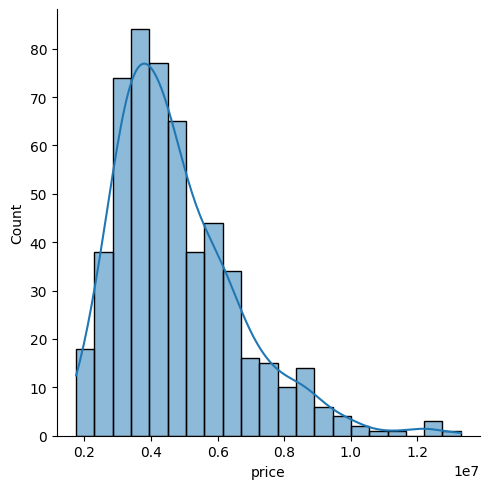

In [9]:
#Analyze the distribution of the target variable
target='price'
plt.figure(figsize=[8,4])
sns.displot(data=df1, x = target,kde=True)

plt.show()
#The mode is at the forth box

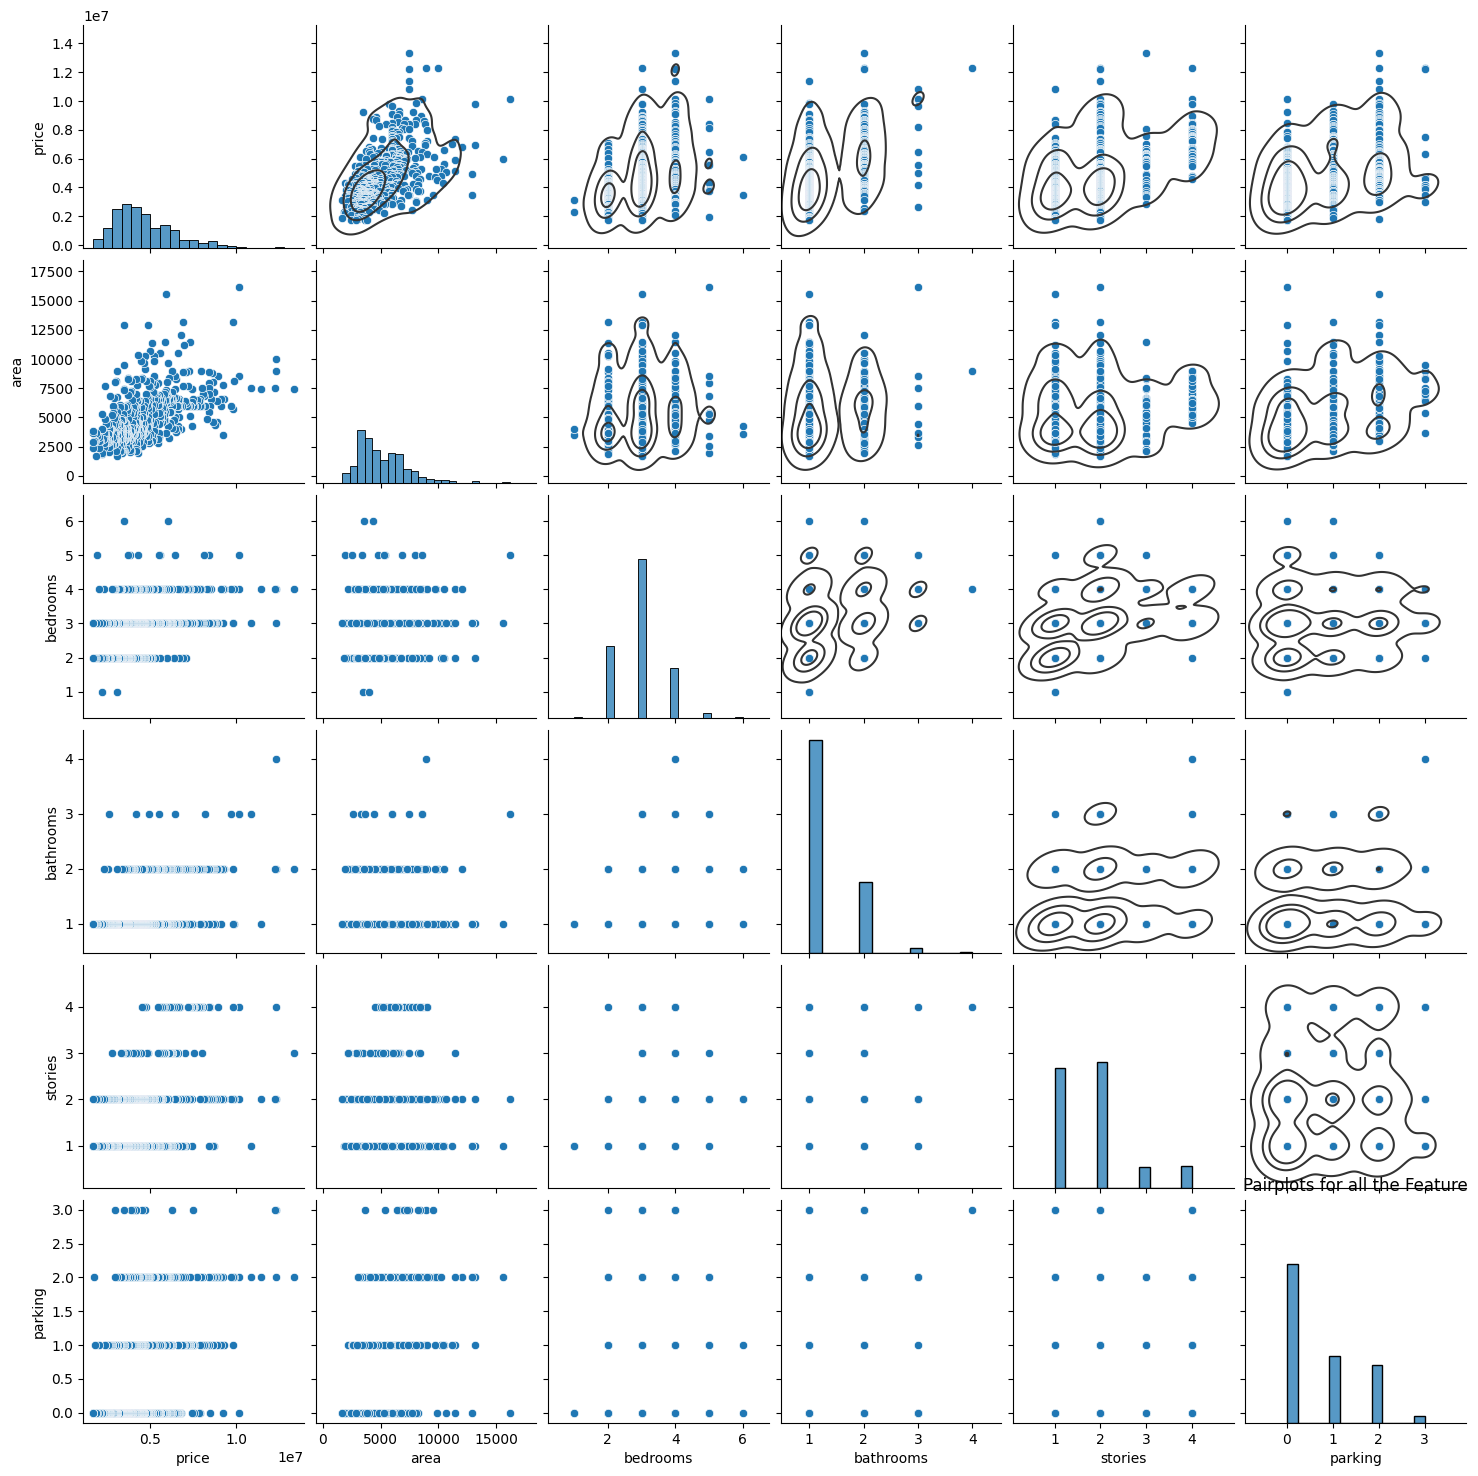

In [10]:
#Understanding the relationship between all the features

m = sns.pairplot(dataset)
plt.title('Pairplots for all the Feature')
m.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

# In the correlated matrix we can see that area affects the price the most so lets look it pair plot

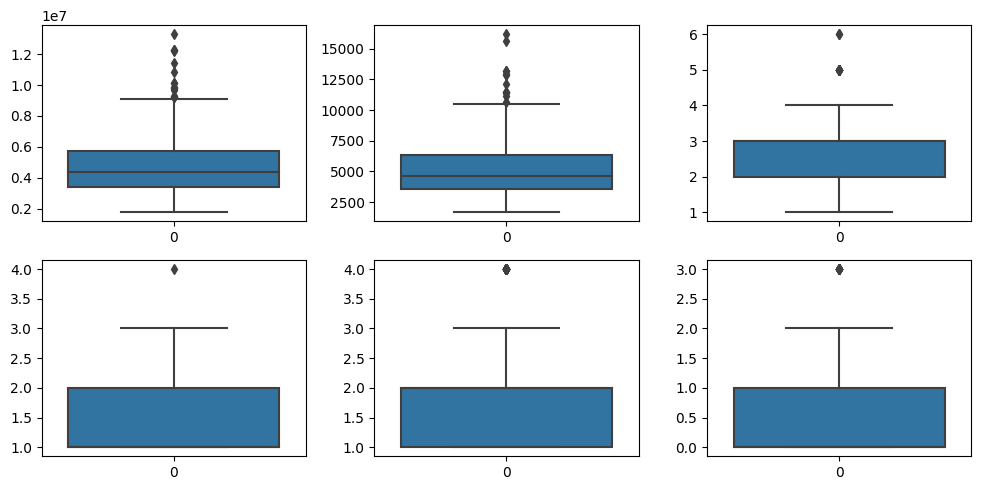

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(dataset['price'], ax = axs[0,0])
plt2 = sns.boxplot(dataset['area'], ax = axs[0,1])
plt3 = sns.boxplot(dataset['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(dataset['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(dataset['stories'], ax = axs[1,1])
plt3 = sns.boxplot(dataset['parking'], ax = axs[1,2])

plt.tight_layout()
#We can see that price and area have noticable outliers

<ipython-input-12-9cbdcdc21271>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

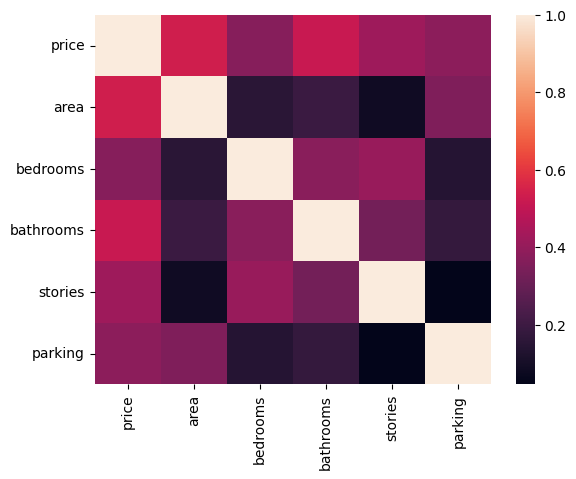

In [12]:
#Check correlation of data in the dataset
#All of the nonccategorical features are moderately correlated
sns.heatmap(dataset.corr())

# Data Preprocessing

**Data Cleaning**

Dealing with missing value
//if no null value it is clean

In [13]:
# Checking null value, if no null value then it is clean
dataset.isnull().sum()*100/dataset.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

Dealing witih Duplicates

In [14]:
#Removal of Duplicate rows(if any)
counter=0
rs,cs=dataset.shape
datasettemp=dataset.copy()
datasettemp.drop_duplicates(inplace=True)

if(datasettemp.shape==rs,cs):
  print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-datasettemp.shape[0]}')
    dataset=datasettemp




Inference: The dataset doesn't have any duplicates


Handling Outlier

In [15]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

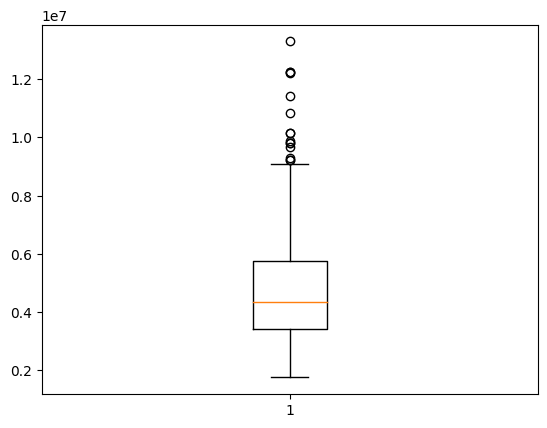

In [16]:
# outlier treatment for price
plt.boxplot(dataset.price)
Q1 = dataset.price.quantile(0.25)
Q3 = dataset.price.quantile(0.75)
IQR = Q3 - Q1
dataset= dataset[(dataset.price >= Q1 - 1.5*IQR) & (dataset.price <= Q3 + 1.5*IQR)]

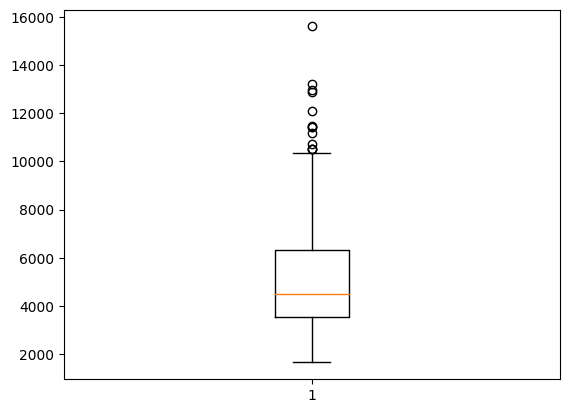

In [17]:
# outlier treatment for area
plt.boxplot(dataset.area)
Q1 = dataset.area.quantile(0.25)
Q3 =dataset.area.quantile(0.75)
IQR = Q3 - Q1
dataset= dataset[(dataset.area >= Q1 - 1.5*IQR) & (dataset.area <= Q3 + 1.5*IQR)]

In [18]:
#Check shape after removal of outlier
dataset.shape

(517, 13)

In [19]:
#Reset index, since removing outlier will cause the index to be out of shape
#It does not affect the model as it is not a feature, but it is done for neater data
dataset=dataset.reset_index(drop=True)

**Data Encoding**

Handling categorical feature

In [20]:
# Data encoding for 'mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'
# Create method for encoding
def encoding (dataset, column, value):
  datast = dataset.copy()
  dataset[column] = dataset[column].apply(lambda x : 1 if x == value else 0)
  return dataset

In [21]:
#Encode 'mainroad' data
#yes -1 no-0
dataset=encoding(dataset,'mainroad','yes')

In [22]:
#Encode 'guestroom' data
#yes -1 no-0
dataset=encoding(dataset,'guestroom','yes')

In [23]:
#Encode 'basement' data
#yes -1 no-0
dataset=encoding(dataset,'basement','yes')

In [24]:
#Encode 'hotwaterheating' data
#yes -1 no-0
dataset=encoding(dataset,'hotwaterheating','yes')

In [25]:
#Encode 'airconditioning' data
#yes -1 no-0
dataset=encoding(dataset,'airconditioning','yes')

In [26]:
#Encode 'prefarea' data
#yes -1 no-0
dataset=encoding(dataset,'prefarea','yes')

In [27]:
#Encode 'funiishingstatus' data
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(dataset['furnishingstatus'])

In [28]:
# Check what the dataset 'status'
status.head(10)

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


In [29]:
# Drop the first column from status df using 'drop_first = True'
# We dont need 3 column as 2 column is enough to show furnishing status
# 00 furnished
# 01 unfurnished
# 10 semi-funished

status = pd.get_dummies(dataset['furnishingstatus'], drop_first = True)

In [30]:
# Add the results to the original dataset

dataset = pd.concat([dataset, status], axis = 1)

In [31]:
# Check the head of our dataset

dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [32]:
# Drop 'furnishingstatus' as we have created the dummies for it

dataset.drop(['furnishingstatus'], axis = 1, inplace = True)

In [33]:
#check the head of our dataset to see if furnishing status has been succesfully deleted

dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [34]:
#Show dataset after all categorical variable are encoded
dataset.shape

(517, 14)

**Split data into training and testing sets**




In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#copy dataset to df so that we can keep the orginal dataset
dt=dataset.copy()

# Specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
dt_train, dt_test = train_test_split(dt, train_size = 0.7, test_size = 0.3, random_state = 42)


**Feature Scalling**

In [36]:
#Only normalize non-category feature
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

Data Normalization

>x'=(x-min)/range



In [37]:
#Normalize training set
dt_train[num_vars]=dt_train[num_vars].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [38]:
dt_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
311,0.290476,0.247128,0.2,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
368,0.238095,0.226244,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,0,1
23,0.845238,0.504699,0.4,0.0,1.000000,1,1,0,0,1,0.666667,0,0,1
271,0.333333,0.481494,0.4,0.0,0.000000,1,0,0,1,0,0.666667,0,1,0
299,0.304762,0.284256,0.6,0.0,0.000000,0,0,1,0,0,0.000000,0,0,1


In [39]:
dt_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.376016,0.371699,0.383934,0.128809,0.258541,0.853186,0.171745,0.340720,0.052632,0.313019,0.212373,0.204986,0.398892,0.349030
std,0.208847,0.203277,0.145553,0.231303,0.286973,0.354412,0.377682,0.474609,0.223607,0.464366,0.274122,0.404252,0.490350,0.477325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223810,0.222764,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.320223,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.504762,0.504699,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Normalize testing set
dt_test[num_vars]=dt_test[num_vars].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [41]:
dt_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
304,0.295238,0.642032,0.333333,0.5,0.000000,1,1,1,0,0,1.0,0,0,0
501,0.071429,0.262125,0.333333,0.0,0.333333,1,0,1,0,0,0.0,0,0,1
441,0.171429,0.334873,0.000000,0.0,0.000000,1,0,0,0,0,0.0,0,0,0
153,0.475238,0.502309,0.333333,0.0,0.000000,1,0,1,0,0,0.0,1,1,0
503,0.065714,0.415704,0.333333,0.0,0.000000,0,0,0,0,1,0.0,1,0,1


In [42]:
dt_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000
mean,0.400885,0.378110,0.331197,0.134615,0.279915,0.846154,0.192308,0.358974,0.019231,0.294872,0.230769,0.24359,0.455128,0.314103
std,0.234516,0.212864,0.246835,0.236549,0.292062,0.361963,0.395383,0.481245,0.137777,0.457454,0.297216,0.43063,0.499586,0.465652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.226190,0.205543,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.352381,0.334873,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.573810,0.508083,0.333333,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Display Correlation Matrix**

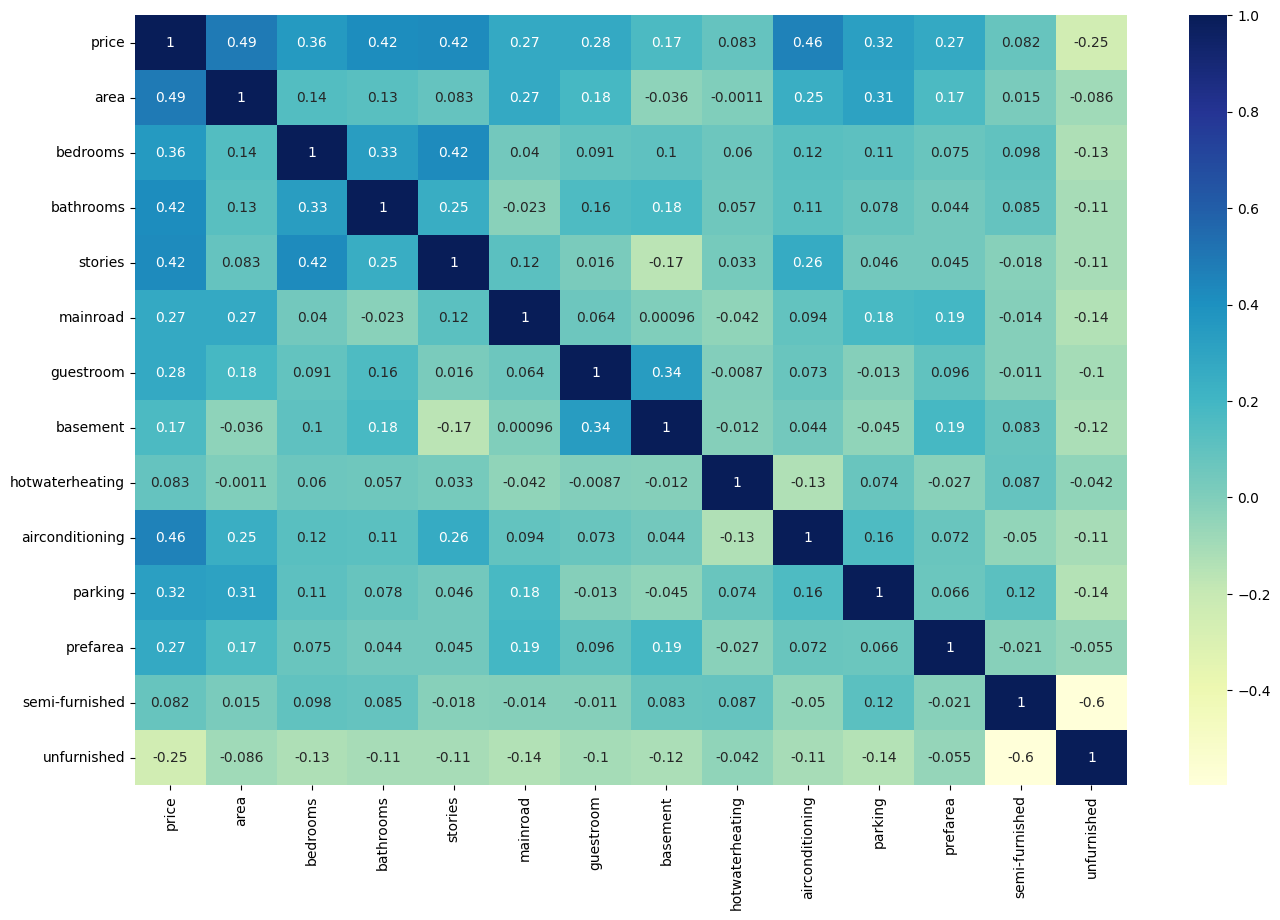

In [43]:
# Let's check the correlation coefficients of the train data to see which variables are highly correlated
#This is for feature extraction purposes
#most of the feaures are moderately correlated to price
#Area is strongly corelated to price
plt.figure(figsize = (16, 10))
sns.heatmap(dt_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [62]:
dt_train.to_csv('cleaned_trainset',index='False')
dt_test.to_csv('cleaned_testset',index='False')

# **Model Devolopment**

**Divide into X and Y sets for model building**

In [44]:
#split df_train into x_train and y_train (with normalization)
#x_train->all the features except price, independent variable 
#y_train-> price, dependent varible
X_train = dt_train.drop(['price'], axis=1)
Y_train = dt_train['price']


**Model Buiding**

> Multiple Linear Regression



In [45]:
#Fitting Multiple Linear Regression to the Training Set(with normalization)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#To predict train price, for evaluation of overfitting
predTrain=regressor.predict(X_train)



# **Model Evaluation**

**Testing**

In [46]:
#split df_test into x_test and y_test(with normalization)
#x_test->all the features except price, independent variable 
#y_test-> price, dependent varible,actual value for MSE

X_test=dt_test.drop(['price'],axis=1)
Y_test=dt_test['price']

# to output predicted test price
predTest=regressor.predict(X_test)


**Display Coefficient and Intercept**

In [47]:
#Check current coefficient generated
print("Coefficient: \n",regressor.coef_)

print("\n")

#Check intercept
print("Intercept: \n",regressor.intercept_)


Coefficient: 
 [ 0.27605434  0.07095886  0.19395422  0.17610498  0.05204177  0.05937025
  0.04366858  0.08494816  0.11419642  0.0985823   0.06607403 -0.00107411
 -0.03524903]


Intercept: 
 0.04420808070763871


**Residual Analysis of train data**

In [48]:
#Calculate residual
residual=Y_train - predTrain

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

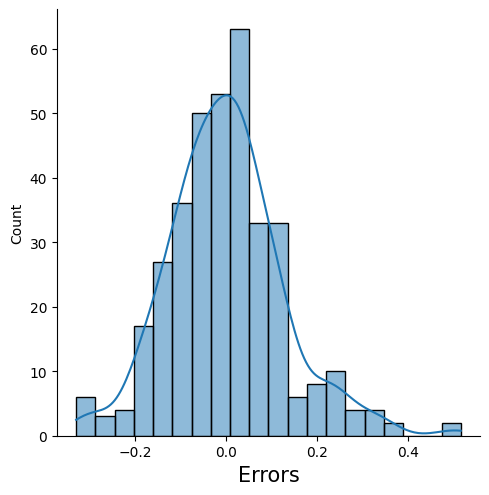

In [49]:
#Error Term Graph
fig = plt.figure()
sns.displot((Y_train - predTrain),kde=True,bins=20)
#sns.distplot((Y_train - predTrain), bins = 20)

plt.xlabel('Errors', fontsize = 15)  # X-label

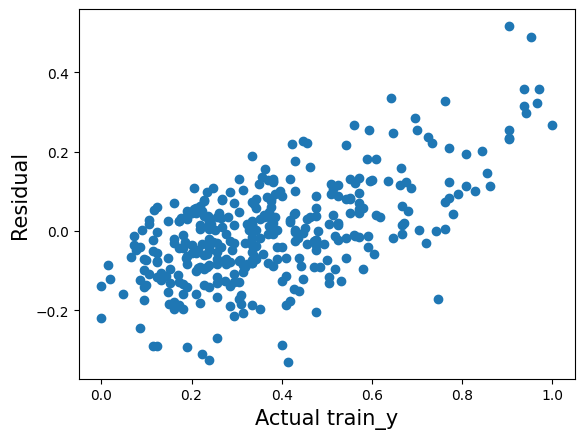

In [50]:
plt.scatter(Y_train,residual)
# X-label
plt.xlabel('Actual train_y', fontsize = 15) 
# y-label
plt.ylabel('Residual', fontsize = 15) 
plt.show()

**Comparison of Training Set and Testing Set**

In [51]:
#Check evaluation metrices for Training Set
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(Y_train, predTrain),15))
print('Residual Sum of Squares (RSS)  :',round(np.sum(np.square(Y_train-predTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(Y_train, predTrain),15))
print('Root Mean Squared Error (RMSE) :',round(np.sqrt(mean_squared_error(Y_train, predTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check evaluation metric for Testing Set
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(Y_test, predTest),15))
print('Residual Sum of Squares (RSS)  :',round(np.sum(np.square(Y_test-predTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(Y_test, predTest),15))
print('Root Mean Squared Error (RMSE) :',round(np.sqrt(mean_squared_error(Y_test, predTest)),15))
print('---------------------------------------------------')

---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.633740768295456
Residual Sum of Squares (RSS)  : 5.751040481223631
Mean Squared Error (MSE)       : 0.015930860058791
Root Mean Squared Error (RMSE) : 0.12621751090396
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.704969619056191
Residual Sum of Squares (RSS)  : 2.51503955298016
Mean Squared Error (MSE)       : 0.016122048416539
Root Mean Squared Error (RMSE) : 0.126972628611601
---------------------------------------------------


**Result Visualisation**

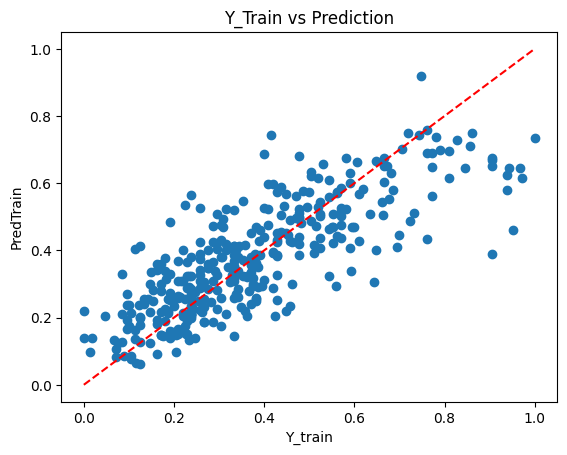

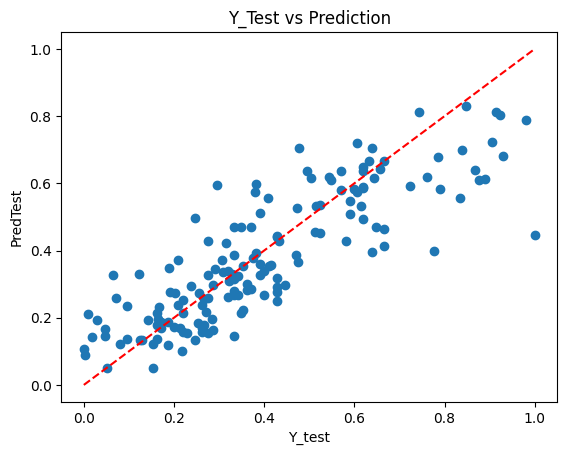

In [52]:
#To show Y Actual vs Y Predicted
#To show relation between actual and predicted price for trainingplt.scatter(Y_train,predTrain)
plt.scatter(Y_train,predTrain)
plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()], 'r--')
plt.title('Y_Train vs Prediction')         
plt.xlabel('Y_train')                       
plt.ylabel('PredTrain')                       
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(Y_test,predTest)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
plt.title('Y_Test vs Prediction')         
plt.xlabel('Y_test')                       
plt.ylabel('PredTest')                       
plt.show()

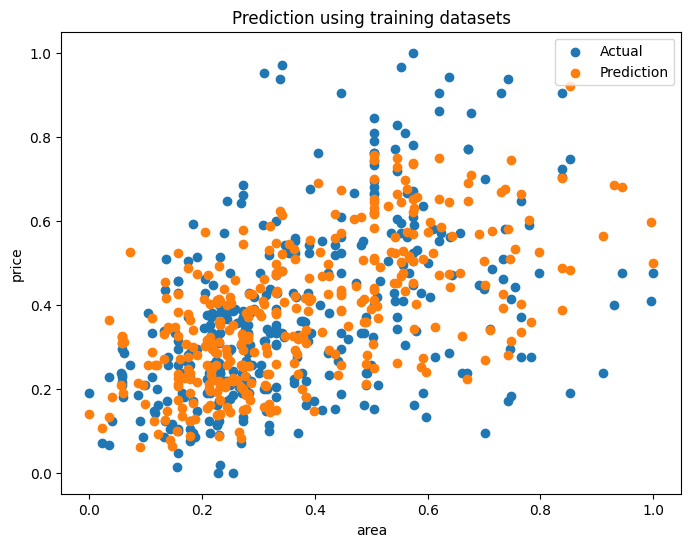

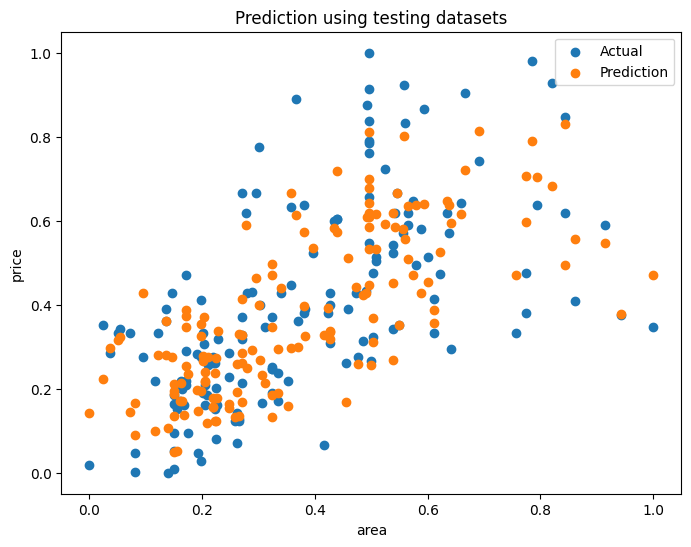

In [53]:
#To show scatter plot of actual and prediction in a same plane for easy visualisation 

#For Training Set
plt.figure(figsize=[8,6])  
plt.title('Prediction using training datasets')
plt.scatter(y= Y_train, x= X_train['area'], label='Actual')
plt.scatter(y=predTrain, x= X_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

print("\n")
plt.figure(figsize=[8,6])  
plt.title('Prediction using testing datasets')
plt.scatter(y= Y_test, x= X_test['area'], label='Actual')
plt.scatter(y=predTest, x= X_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

**Hyperparameter Tunning**

Lasso (L1 Regularization + Grid Seach CV)

In [54]:
#Carry out Fine tuning with L1 regularization
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Declare L1 for Lasso model
L1=linear_model.Lasso()

#State a list of alpha paramater as Grid Search CV requires us to give a set of parameters 
params = {'alpha': [0.00001,0.0001,0.001,0.01, 0.1, 1, 10]}
L1_search = GridSearchCV(L1, param_grid=params, scoring='r2')
L1_search.fit(X_train, Y_train)

# Get the best hyperparameters and fit the model
best_params = L1_search.best_params_
L1.set_params(**best_params).fit(X_train, Y_train)

#Predict the price for trainn and testing with newly fitted model
predLsTrain=L1.predict(X_train)
predLsTest=L1.predict(X_test)

#This method will get the same output as a bove.
#However, I predicted using L1 bcs lasso is my optimization model while grid search helps me find the best parameter
#predLsTrain=L1_search.predict(X_train)
#predLsTest=L1_search.predict(X_test)

#Calculate the best mse,rmse,mae,r2
mse = mean_squared_error(Y_test, predLsTest)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y_test - predLsTest))
r2 = L1_search.score(X_test, Y_test)

#Display them 
print('After Rigrid (L1 Regularization')
print('Best alpha:', L1_search.best_params_['alpha'])
print(f'Best MSE: {mse:.15f}')
print(f'Best RMSE: {rmse:.15f}')
print(f'Best MAE: {mae:.15f}')
print(f'Best R-squared: {r2:.15f}')

#As we can see below, the best alpha is 0.001 for this model. 
#The value R2 score is a slight decrease bcs the Regularization L1 is expectted to reduce some of features (exp: coefficient decrease to 0) due to introduction of penalty term
#L1 regularization is know for overcoming overfitting so with lower R2 might work better?


After Rigrid (L1 Regularization
Best alpha: 0.001
Best MSE: 0.016169308796555
Best RMSE: 0.127158597021811
Best MAE: 0.094551532560185
Best R-squared: 0.704104763204171


*Evaluation after L1 regularisation*

In [55]:
#Check evaluation metrices for Training Set(Optimization)
print('L1 Regularization(Lasso) + Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(Y_train, predLsTrain),15))
print('Residual Sum of Squares (RSS)  :',round(np.sum(np.square(Y_train-predLsTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(Y_train, predLsTrain),15))
print('Root Mean Squared Error (RMSE) :',round(np.sqrt(mean_squared_error(Y_train, predLsTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check evaluation metric for Testing Set(optimization with L1 regularization)
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(Y_test, predLsTest),15))
print('Residual Sum of Squares (RSS)  :',round(np.sum(np.square(Y_test-predLsTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(Y_test, predLsTest),15))
print('Root Mean Squared Error (RMSE) :',round(np.sqrt(mean_squared_error(Y_test, predLsTest)),15))
print('---------------------------------------------------')

L1 Regularization(Lasso) + Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.63161886995274
Residual Sum of Squares (RSS)  : 5.784358749296243
Mean Squared Error (MSE)       : 0.016023154430183
Root Mean Squared Error (RMSE) : 0.126582599239325
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.704104763204171
Residual Sum of Squares (RSS)  : 2.522412172262612
Mean Squared Error (MSE)       : 0.016169308796555
Root Mean Squared Error (RMSE) : 0.127158597021811
---------------------------------------------------


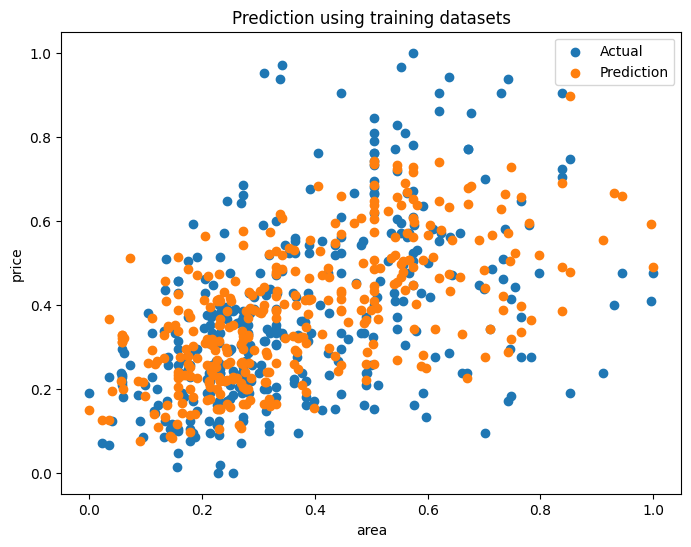

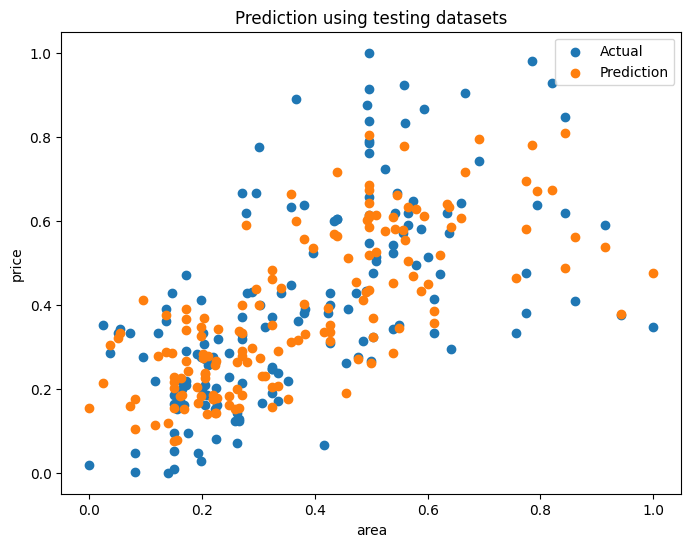

In [56]:
#Scatter plot to see the comparison od actual and predicted value after optimization of hyperparameter
#Training set (L1 Regularisation+Grid Search CV)
plt.figure(figsize=[8,6])  
plt.title('Prediction using training datasets')
plt.scatter(y= Y_train, x= X_train['area'], label='Actual')
plt.scatter(y=predLsTrain, x= X_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

print('\n')

#Testing set (L1 Regularisation+Grid Search CV)
plt.figure(figsize=[8,6])  
plt.title('Prediction using testing datasets')
plt.scatter(y= Y_test, x= X_test['area'], label='Actual')
plt.scatter(y=predLsTest, x= X_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

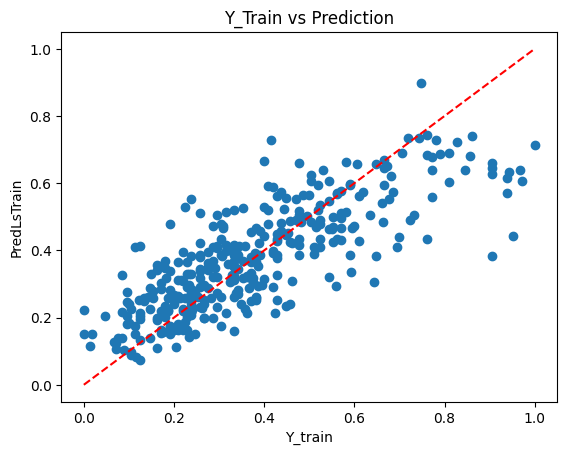

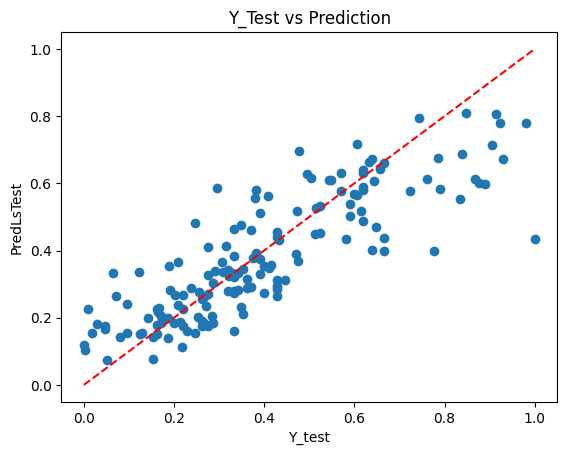

In [57]:
#To show Y Actual vs Y Predicted( L1 Regularisation+Grid Search CV)
#To show relation between actual and predicted price for training
plt.scatter(Y_train,predLsTrain)
plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()], 'r--')
plt.title('Y_Train vs Prediction')         
plt.xlabel('Y_train')                       
plt.ylabel('PredLsTrain')                       
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(Y_test,predLsTest)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
plt.title('Y_Test vs Prediction')         
plt.xlabel('Y_test')                       
plt.ylabel('PredLsTest')                       
plt.show()

Rigrid(L2 regularization)+Grid Search CV

In [58]:
# L2 regularzation +Grid Search CV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the hyperparameters to tune
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the linear regression model with Ridge regularization
L2 = Ridge()

# Use grid search to find the best hyperparameters
L2_search = GridSearchCV(L2, params, cv=5, scoring='r2')
L2_search.fit(X_train, Y_train)

# Get the best hyperparameters and fit the model
best_params = L2_search.best_params_
L2.set_params(**best_params).fit(X_train, Y_train)

# Evaluate the model on the test set
predRgTrain=L2.predict(X_train)
predRgTest=L2.predict(X_test)

#Get best mse,rmse,mae.r2
mse = mean_squared_error(Y_test, predRgTest)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y_test - predRgTest))
r2 = L2.score(X_test, Y_test)

print('After Rigrid (L2 Regularization')
print(f'Best hyperparameters: {best_params}')
print(f'Best test MSE: {mse:.15f}')
print(f'Best test RMSE: {rmse:.15f}')
print(f'Best test MAE: {mae:.15f}')
print(f'Best test R-squared: {r2:.15f}')


After Rigrid (L2 Regularization
Best hyperparameters: {'alpha': 1}
Best test MSE: 0.016243911157523
Best test RMSE: 0.127451603197146
Best test MAE: 0.095838597444694
Best test R-squared: 0.702739554366754


*Evaluation after L2 regularisation*

In [59]:
#Check evaluation metrices for Training Set(L2 Regularization+ Grid Search CV)\
print('L1 Regularization(Lasso) + Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(Y_train, predRgTrain),15))
print('Residual Sum of Squares (RSS)  :',round(np.sum(np.square(Y_train-predRgTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(Y_train, predRgTrain),15))
print('Root Mean Squared Error (RMSE) :',round(np.sqrt(mean_squared_error(Y_train, predRgTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check evaluation metric for Testing Set(L2 Regularization+ Grid Search CV))
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(Y_test, predRgTest),15))
print('Residual Sum of Squares (RSS)  :',round(np.sum(np.square(Y_test-predRgTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(Y_test, predRgTest),15))
print('Root Mean Squared Error (RMSE) :',round(np.sqrt(mean_squared_error(Y_test, predRgTest)),15))
print('---------------------------------------------------')

L1 Regularization(Lasso) + Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.633316903054982
Residual Sum of Squares (RSS)  : 5.757696057235203
Mean Squared Error (MSE)       : 0.015949296557438
Root Mean Squared Error (RMSE) : 0.126290524416673
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.702739554366754
Residual Sum of Squares (RSS)  : 2.534050140573533
Mean Squared Error (MSE)       : 0.016243911157523
Root Mean Squared Error (RMSE) : 0.127451603197146
---------------------------------------------------


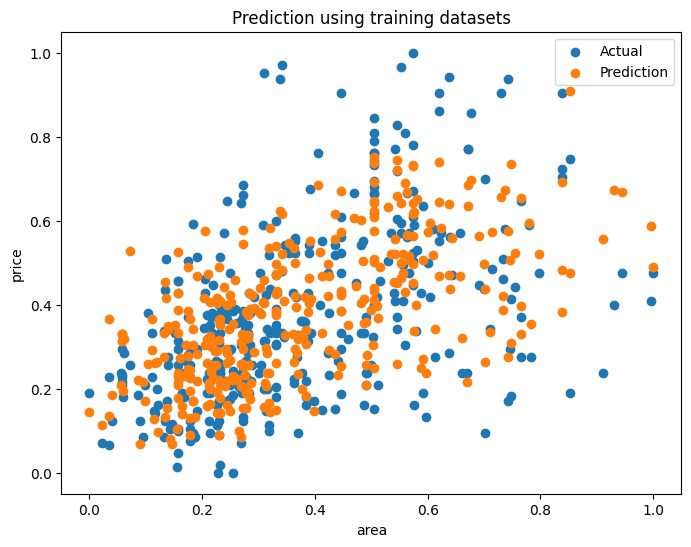

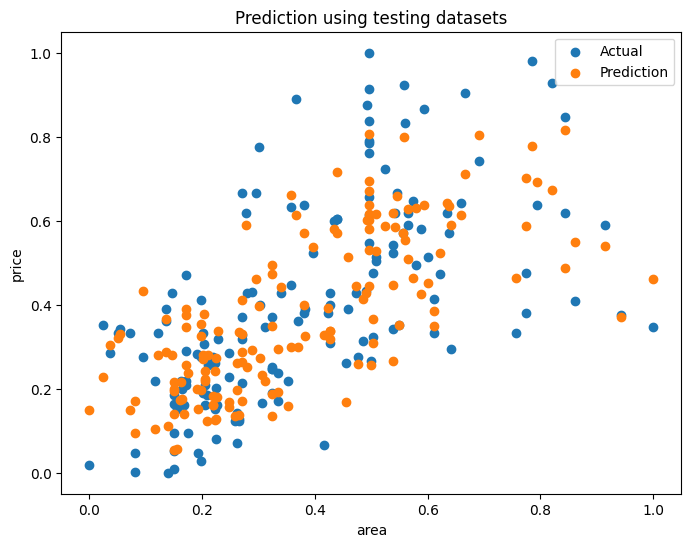

In [60]:
#Scatter plot to see the comparison od actual and predicted value after optimization of hyperparameter
#Training set (L1 Regularisation+Grid Search CV)
plt.figure(figsize=[8,6])  
plt.title('Prediction using training datasets')
plt.scatter(y= Y_train, x= X_train['area'], label='Actual')
plt.scatter(y=predRgTrain, x= X_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

print('\n')

#Training set (L2 Regularisation+Grid Search CV)
plt.figure(figsize=[8,6])  
plt.title('Prediction using testing datasets')
plt.scatter(y= Y_test, x= X_test['area'], label='Actual')
plt.scatter(y=predRgTest, x= X_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

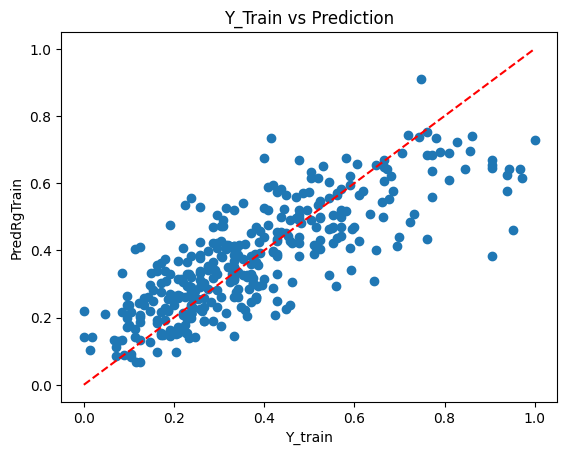

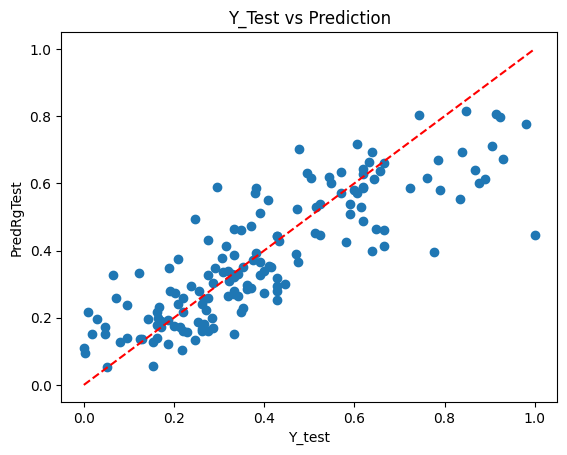

In [61]:
#To show Y Actual vs Y Predicted( L2 Regularisation+Grid Search CV)
#To show relation between actual and predicted price for training
plt.scatter(Y_train,predRgTrain)
plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()], 'r--')
plt.title('Y_Train vs Prediction')         
plt.xlabel('Y_train')                       
plt.ylabel('PredRgTrain')                       
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(Y_test,predRgTest)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
plt.title('Y_Test vs Prediction')         
plt.xlabel('Y_test')                       
plt.ylabel('PredRgTest')                       
plt.show()